<a href="https://colab.research.google.com/github/josuedavendano/lead-levels-nyc-children/blob/master/ChildrenUnder6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pa
from pandas import Series,DataFrame
import numpy as np
import matplotlib.pyplot as plt

data=pa.read_csv('Children_Under_6_yrs_with_Elevated_Blood_Lead_Levels__BLL_.csv')

#Unifying the boroughs since the data is all over the place
data['borough_id'].replace([1],'Bronx',inplace=True)
data['borough_id'].replace([2],'Brooklyn',inplace=True)
data['borough_id'].replace([3],'Manhatten',inplace=True)
data['borough_id'].replace([4],'Queens',inplace=True)
data['borough_id'].replace([5],'Staten Island',inplace=True)

#Placing everything into a Dataframe to change the columns into something easier to work with
newData=pa.DataFrame(data, columns=['borough_id','time_period', 'Children under 6 years with elevated blood lead levels (BLL) Number BLL >=5 µg/dL','Children under 6 years with elevated blood lead levels (BLL) Number BLL>=10 µg/dL','Children under 6 years with elevated blood lead levels (BLL) Number BLL>=15 µg/dL'])
newData.columns=['Borough','Year', 'Lead Levels>=5 MCG/DL','Lead Levels>=10 MCG/DL','Lead Levels>=15 MCG/DL']
newData

#Creating a pivot table to include total data
pivot = newData.pivot_table(index = ['Year',"Borough"], values = ['Lead Levels>=15 MCG/DL','Lead Levels>=5 MCG/DL','Lead Levels>=10 MCG/DL'],aggfunc=np.sum)

#Inserting a slicer to only show relevant years
pivot.query('Year == [2014,2015,2016]')


Lead Levels>=10 MCG/DL  Lead Levels>=15 MCG/DL  \
Year Borough                                                         
2014 Bronx                             354                     136   
     Brooklyn                          824                     298   
     Manhatten                         136                      40   
     Queens                            542                     190   
     Staten Island                      62                      18   
2015 Bronx                             310                     122   
     Brooklyn                          846                     284   
     Manhatten                         118                      38   
     Queens                            488                     174   
     Staten Island                      54                      18   
2016 Bronx                             324                     142   
     Brooklyn                          752                     244   
     Manhatten                          92                      44   
     Queens                            406                     150   
     Staten Island                      70                      20   

                    Lead Levels>=5 MCG/DL  
Year Borough                               
2014 Bronx                           2369  
     Brooklyn                        5854  
     Manhatten                       1068  
     Queens                          3312  
     Staten Island                    476  
2015 Bronx                           1937  
     Brooklyn                        4911  
     Manhatten                        787  
     Queens                          2750  
     Staten Island                    328  
2016 Bronx                           1763  
     Brooklyn                        4627  
     Manhatten                        567  
     Queens                          2490  
     Staten Island                    384

Text(0.5, 1.0, '2014 Blood Lead levels for children under age 6')

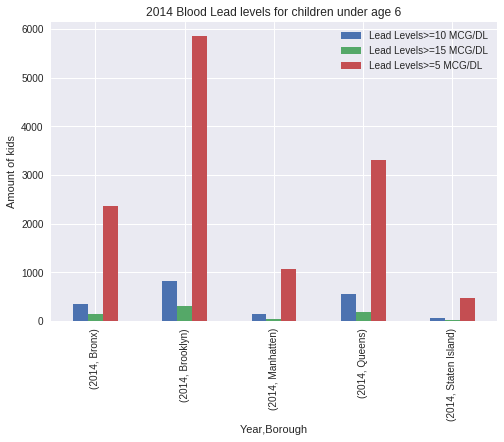

In [0]:
#Displaying lead levels 2014
pivot.query('Year == 2014').plot(kind = 'bar')
plt.ylabel("Amount of kids")
plt.title('2014 Blood Lead levels for children under age 6')

Text(0.5, 1.0, '2015 Blood Lead levels for children under age 6')

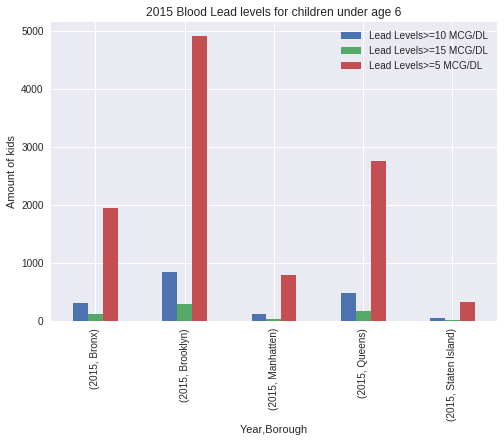

In [0]:
#Displaying lead levels 2015
pivot.query('Year == 2015').plot(kind = 'bar')
plt.ylabel("Amount of kids")
plt.title('2015 Blood Lead levels for children under age 6')

Text(0.5, 1.0, '2016 Blood Lead levels for children under age 6')

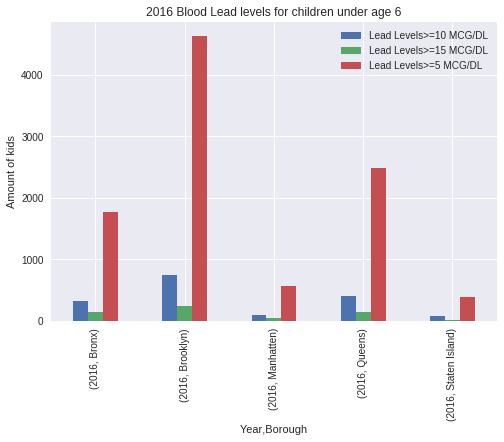

In [0]:
#Displaying lead levels 2016
pivot.query('Year == 2016').plot(kind = 'bar')
plt.ylabel("Amount of kids")
plt.title('2016 Blood Lead levels for children under age 6')

In [0]:
fiveL=newData.groupby('Borough')['Lead Levels>=5 MCG/DL'].sum()
tenL=newData.groupby('Borough')['Lead Levels>=10 MCG/DL'].sum()
fifL=newData.groupby('Borough')['Lead Levels>=15 MCG/DL'].sum()

totalL=fiveL+tenL+fifL

totalL

Borough
Bronx             87168
Brooklyn         189140
Manhatten         48227
Queens           102999
Staten Island     13714
dtype: int64